## 1. kmx_mirror
##  2.~12. figure2~figure11
## 13. calculate the distance among words in a topic
## 14. similarity
## 15. perplexity
## 16. scatter
## 17. compare with Nichoals paper


### to do：
1. sankey
2. 

In [1]:
# -*- coding:UTF-8 -*-
  
from corpus import *
from vsm import *

# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

k = topic_range[4]
v = lda_v[k]

%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='wqy-microhei.ttc')
import sys
reload(sys)


kongzi = []
mengzi = []
xunzi =[]
count = 0
for label in v.labels[:]:
    if '孟子'.decode('utf-8') in label:
        mengzi.append(count)
    elif '论语'.decode('utf-8') in label:
        kongzi.append(count)
    elif '荀子'.decode('utf-8') in label:
        xunzi.append(count)
    count += 1

    
    
# get term frequency in a particular corpus
def term_freq_labels(term,labels):
    count = 0
    for i in labels: 
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        count += (document == term.decode('utf-8')).sum()
    return count

#get the whole occurrances in a corpus
def allfreq(labels):
    countall = 0    
    for i in labels:
        #wenzi = []
        num = []
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        for a in set(document):
            count = 0
            count += (document == a.decode('utf-8')).sum()
            num.append(count)
            #wenzi.append([a,count])
        countall += sum(num)   
    return countall


## Get list for topics and topics_weight

#1.找到前十的topic的编号
top10topics = []
top10topicsweight = []
for a in v.aggregate_doc_topics(v.labels[:], normed_sum=True):
    top10topics.append(a[0])
    top10topicsweight.append(a[1])
print top10topics[:10]

#2.生成每个topic的值
wordf = []
wordw = []
word=[]
for a in top10topics[:10]:
    for b in v.topics()[a][:10]:
        wordw.append(b[1])
        word.append(b[0])
        wordf.append(tf_v.coll_freq(b[0]))
def chunks(arr, n):
    return [arr[i:i+n] for i in range(0, len(arr), n)]
#print chunks(wordw,10),chunks(word,10),chunks(wordf,10)


Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K{0}-document-4000.npz
Loading LDA data from /home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K100-document-4000.npz


## Figure 2  
Keyword loading in Highest Loading Ten Topics in Our Corpus
Figure 2 y label is word-weight
Figure 2.1 y label is frequency

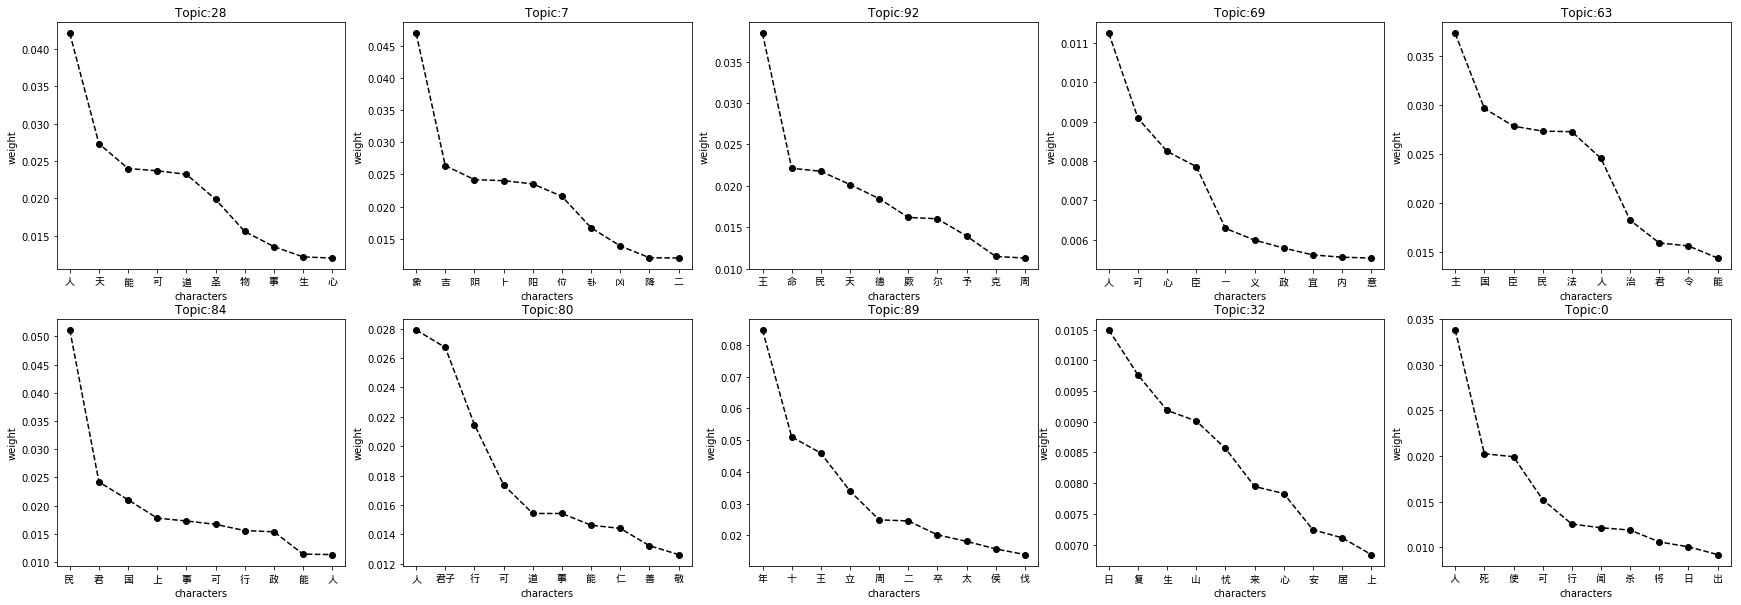

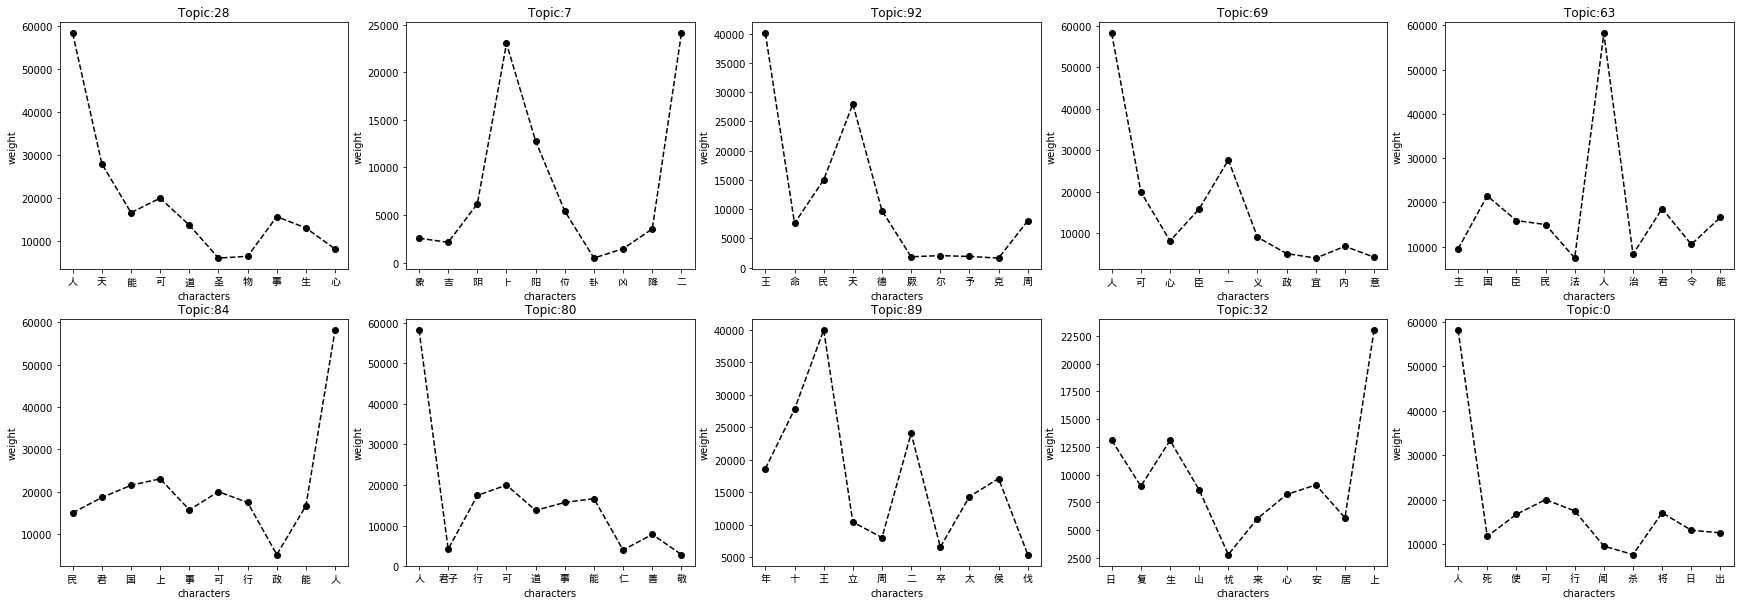

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='wqy-microhei.ttc')
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

fig2 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordw,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 2')
    
fig21 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordf,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 21')

## Figure 3 Highest Loading 10 Topics in Corpus
'Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'

In [3]:
v.topics(print_len=10)

[LabeledColumn([(u'\u4eba', 3.3815280e-02), (u'\u6b7b', 2.0253042e-02),
                (u'\u4f7f', 1.9934436e-02), ...,
                (u'\u611a', 8.5930814e-08), (u'\u79ef', 8.5799421e-08),
                (u'\u5411', 8.5668027e-08)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4e66', 4.1604038e-02), (u'\u672c', 2.6193593e-02),
                (u'\u5341', 1.8187566e-02), ...,
                (u'\u95f5', 4.6216886e-07), (u'\u6dee', 4.6216886e-07),
                (u'\u82e6', 4.6163925e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4eba', 7.4799560e-02), (u'\u795e', 4.3381054e-02),
                (u'\u6b7b', 3.1947423e-02), ...,
                (u'\u91d1', 4.8014124e-07), (u'\u4ee4', 4.7995798e-07),
                (u'\u59cb', 4.7794214e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6c0f', 5.0128605e-02), (u'\u5e1d', 4.8180617e-02),
                (u'\u821c', 2.4371902e-02), ...,
                (u'\u522b', 4.3264797e-07), (u'\u8bb0', 4.3264797e-07),
                (u'\u661f', 4.3248284e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4e27', 4.4225462e-02), (u'\u54ed', 3.2142170e-02),
                (u'\u4eba', 3.1054672e-02), ...,
                (u'\u5b9d', 6.0360236e-07), (u'\u8d24', 6.0291097e-07),
                (u'\u6587', 6.0198909e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u661f', 5.8767732e-02), (u'\u6708', 2.8109865e-02),
                (u'\u65e5', 2.7221788e-02), ...,
                (u'\u664f', 3.8568618e-07), (u'\u7acb', 3.8561254e-07),
                (u'\u79c1', 3.8531795e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5c3a', 5.6077499e-02), (u'\u5bf8', 3.2432191e-02),
                (u'\u4e00', 3.0687863e-02), ...,
                (u'\u5904', 6.4519890e-07), (u'\u8d2a', 6.4519890e-07),
                (u'\u798f', 6.4470601e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u8c61', 4.6938650e-02), (u'\u5409', 2.6354685e-02),
                (u'\u9634', 2.4190873e-02), ...,
                (u'\u7f8e', 5.5451903e-07), (u'\u6740', 5.5409572e-07),
                (u'\u4e50', 5.5282584e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4e00', 1.7525297e-01), (u'\u4e8c', 9.3211032e-02),
                (u'\u738b', 2.9993776e-02), ...,
                (u'\u5de6\u53f3', 7.0149218e-07),
                (u'\u5b81', 7.0095626e-07), (u'\u653f', 6.9881264e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u664b', 7.7313408e-02), (u'\u90d1', 3.1436831e-02),
                (u'\u695a', 3.1212084e-02), ...,
                (u'\u662d', 2.8056567e-07), (u'\u5907', 2.8056567e-07),
                (u'\u60bc', 2.8035134e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5357', 1.9959236e-02), (u'\u8d8a', 1.7933719e-02),
                (u'\u4f7f', 1.7044472e-02), ...,
                (u'\u4e1a', 4.9375689e-07), (u'\u8c37', 4.9356839e-07),
                (u'\u8d24', 4.9356839e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u519b', 5.6945685e-02), (u'\u5c06', 5.0391644e-02),
                (u'\u5974', 2.3859289e-02), ...,
                (u'\u4e30', 2.8697096e-07), (u'\u5916', 2.8686131e-07),
                (u'\u53bf', 2.8686131e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6309', 3.0499887e-02), (u'\u672c', 2.4129948e-02),
                (u'\u4e49', 1.5890572e-02), ...,
                (u'\u6765', 3.4547386e-07), (u'\u5bbe', 3.4547386e-07),
                (u'\u5546', 3.4520974e-07)],
               dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5341', 1.0463508e-01), (u'\u7bc7', 6.7629248e-02),
                (u'\u7b2c', 6.6939160e-02), ...,
                (u'\u5047', 8.6081684e

In [4]:
from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 
keywords = []
for a in chunks(word,10):
    keywords.append('  '.join(a))
topicname =['benevolent rule 德政','ethical rulership道德规范','political affairs 政治事件','political affairs 政治事件','治国','cosmos&astrology 宇宙&占卜','ethics&politics 伦理&政治','political affairs 政治事件','nature&cosmos 自然&宇宙','traditional Chinese medicine 中医']  
data3 = {"Topics":top10topics[:10],"Corpus Weight":top10topicsweight[:10],"Topic Keywords in Descending Order of Weight":keywords,"Topic Name":topicname}
f3 = DataFrame(data3,columns=['Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'])
f3

,Topics,Corpus Weight,Topic Keywords in Descending Order of Weight,Topic Name
0,28,0.031351,人 天 能 可 道 圣 物 事 生 心,benevolent rule 德政
1,7,0.030961,象 吉 阴 上 阳 位 卦 凶 降 二,ethical rulership道德规范
2,92,0.030423,王 命 民 天 德 厥 尔 予 克 周,political affairs 政治事件
3,69,0.030357,人 可 心 臣 一 义 政 宜 内 意,political affairs 政治事件
4,63,0.028121,主 国 臣 民 法 人 治 君 令 能,治国
5,84,0.026380,民 君 国 上 事 可 行 政 能 人,cosmos&astrology 宇宙&占卜
6,80,0.025326,人 君子 行 可 道 事 能 仁 善 敬,ethics&politics 伦理&政治
7,89,0.024653,年 十 王 立 周 二 卒 太 侯 伐,political affairs 政治事件
8,32,0.024014,日 复 生 山 忧 来 心 安 居 上,nature&cosmos 自然&宇宙
9,0,0.023015,人 死 使 可 行 闻 杀 将 日 出,traditional Chinese medicine 中医


##  Figure 4 Corpus weights Topics 0-99


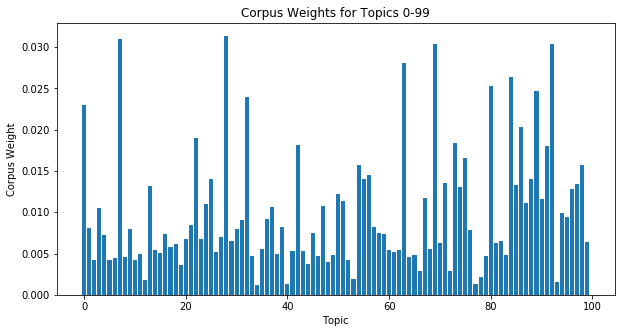

In [5]:
#图四，topic weight 分布

fig4 = plt.figure(figsize=(10,5))
#plt.plot(chunks(wordf,10)[i],'ko--')
plt.bar(top10topics, top10topicsweight)
#plt.ylim(0, max(mean_values) * 1.1)
#ticks = ax.set_xticks(range(0,10))
#labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)

plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure4')

## Figure 5 

They are using topic 34. I just copy the term in their topic

need to find our topic again

In [6]:
term = ['君','人','义','礼','能','贤','莫','天','恶','安']
English = ['nobleman','person','rigteousness','ritual','able','virtuous','do not','day/heaven','evil','peace']

occurrencex = []
occurrencem = []
occurrencek = []

for a in term:
    occurrencek.append(term_freq_labels(a,kongzi))
    occurrencem.append(term_freq_labels(a,mengzi))
    occurrencex.append(term_freq_labels(a,xunzi)) 
    
k = allfreq(kongzi)
m = allfreq(mengzi)
x = allfreq(xunzi)
k_per_1000 = []
m_per_1000 = []
x_per_1000 = []

for a in occurrencek:
    k_per_1000.append(a*1000/float(k))
for a in occurrencek:
    m_per_1000.append(a*1000/float(m))
for a in occurrencek:
    x_per_1000.append(a*1000/float(x))
    
data5 = {"Mengzi per 1000 characters":m_per_1000,"Xunzi per 1000 characters":x_per_1000,"Kongzi per 1000 characters":k_per_1000,"Term":term,"English":English,"Occurrences in Kongzi":occurrencek,"Occurrences in Mengzi":occurrencem,"Occurrences in Xunzi":occurrencex}
f5 = DataFrame(data5,columns=['Term','English','Occurrences in Kongzi','Kongzi per 1000 characters','Occurrences in Mengzi','Mengzi per 1000 characters','Occurrences in Xunzi','Xunzi per 1000 characters'])
f5

,Term,English,Occurrences in Kongzi,Kongzi per 1000 characters,Occurrences in Mengzi,Mengzi per 1000 characters,Occurrences in Xunzi,Xunzi per 1000 characters
0,君,nobleman,48,6.350046,176,2.518627,249,1.173193
1,人,person,201,26.590819,595,10.546752,1176,4.912744
2,义,rigteousness,24,3.175023,109,1.259314,315,0.586596
3,礼,ritual,75,9.921947,70,3.935355,341,1.833113
4,能,able,67,8.863606,140,3.515584,518,1.637581
5,贤,virtuous,25,3.307316,76,1.311785,152,0.611038
6,莫,do not,18,2.381267,60,0.944485,255,0.439947
7,天,day/heaven,48,6.350046,292,2.518627,557,1.173193
8,恶,evil,39,5.159413,80,2.046385,190,0.953219
9,安,peace,17,2.248975,24,0.892014,190,0.415506


## Figure 6   Topic 27 Keywords & Weight
Topic 27 没有相同内容的topic（白马非法论和坚白论）

In [7]:
Chinese = []
Pinyin = ['tian','yu','shi','jian','gui','long','xiong','bing','ji','ren']
English = ['heaven','rain','time','see','turtle','dragon','ominous','illness','propitious','people']
WordWeight = []
for a in v.topics()[17][:10]:
    Chinese.append(a[0])
    WordWeight.append(a[1])

data6 = {"Chinese":Chinese,"pinyin":Pinyin,"English":English,"word weight":WordWeight}
f6 = DataFrame(data6,columns=['Chinese','pinyin','English','word weight'])
f6

,Chinese,pinyin,English,word weight
0,后,tian,heaven,0.077603
1,太,yu,rain,0.051942
2,帝,shi,time,0.044777
3,皇,jian,see,0.038427
4,人,gui,turtle,0.027485
5,王,long,dragon,0.018009
6,宫,xiong,ominous,0.014134
7,年,bing,illness,0.013515
8,长,ji,propitious,0.013450
9,立,ren,people,0.012375


## Figure 7 Weightiest 10 topics in each of Analects,Mencius&Xunzi


In [8]:
la = kongzi
topick=[]
keywordsk = []
keywordk=[]
topicweightk=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topick.append(a[0])
    topicweightk.append(a[1])
for a in topick:
    for b in v.topics()[a][:10]:
        keywordsk.append(b[0])        
for a in chunks(keywordsk,10):
    keywordk.append('  '.join(a))
data71 = {"Topic":topick,"Keywords":keywordk,"Text Weight in Kongzi":topicweightk}
f71 = DataFrame(data71,columns=['Topic','Keywords','Text Weight in Kongzi'])

la = mengzi
topicm=[]
keywordsm = []
keywordm=[]
topicweightm=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicm.append(a[0])
    topicweightm.append(a[1])
for a in topicm:
    for b in v.topics()[a][:10]:
        keywordsm.append(b[0])
for a in chunks(keywordsm,10):
    keywordm.append('  '.join(a))
data72 = {"Topic":topicm,"Keywords":keywordm,"Text Weight in Mengzi":topicweightm}
f72 = DataFrame(data72,columns=['Topic','Keywords','Text Weight in Mengzi'])


la = xunzi
topicx=[]
keywordsx = []
keywordx=[]
topicweightx=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicx.append(a[0])
    topicweightx.append(a[1])   
for a in topicx:
    for b in v.topics()[a][:10]:
        keywordsx.append(b[0])        
for a in chunks(keywordsx,10):
    keywordx.append('  '.join(a))   
data73 = {"Topic":topicx,"Keywords":keywordx,"Text Weight in Xunzi":topicweightx}
f73 = DataFrame(data73,columns=['Topic','Keywords','Text Weight in Xunzi'])


In [9]:
f71   

,Topic,Keywords,Text Weight in Kongzi
0,80,人 君子 行 可 道 事 能 仁 善 敬,0.346982
1,67,孔 人 闻 可 贡 鲁 行 路 礼 君子,0.309733
2,84,民 君 国 上 事 可 行 政 能 人,0.040316
3,45,天 人 国 墨 利 义 王 爱 上 治,0.018724
4,94,拜 宾 人 上 门 出 东 西 君 命,0.018655
5,92,王 命 民 天 德 厥 尔 予 克 周,0.017474
6,85,将 君 使 人 氏 王 叔 可 命 国,0.015832
7,69,人 可 心 臣 一 义 政 宜 内 意,0.015280
8,87,人 可 说 马 一 名 利 能 恶 ─,0.014356
9,56,贤 世 士 能 人 死 身 行 义 名,0.013358


In [10]:
f72

,Topic,Keywords,Text Weight in Mengzi
0,7,象 吉 阴 上 阳 位 卦 凶 降 二,0.042885
1,92,王 命 民 天 德 厥 尔 予 克 周,0.039845
2,28,人 天 能 可 道 圣 物 事 生 心,0.037519
3,63,主 国 臣 民 法 人 治 君 令 能,0.035989
4,80,人 君子 行 可 道 事 能 仁 善 敬,0.032858
5,84,民 君 国 上 事 可 行 政 能 人,0.032687
6,32,日 复 生 山 忧 来 心 安 居 上,0.030625
7,69,人 可 心 臣 一 义 政 宜 内 意,0.027507
8,89,年 十 王 立 周 二 卒 太 侯 伐,0.027130
9,86,月 十 年 二 日 甲 岁 丙 辰 庚,0.027049


In [11]:
f73

,Topic,Keywords,Text Weight in Xunzi
0,22,礼 人 天 民 法 治 道 刑 义 王,0.168206
1,87,人 可 说 马 一 名 利 能 恶 ─,0.161585
2,80,人 君子 行 可 道 事 能 仁 善 敬,0.121151
3,28,人 天 能 可 道 圣 物 事 生 心,0.083913
4,84,民 君 国 上 事 可 行 政 能 人,0.053562
5,63,主 国 臣 民 法 人 治 君 令 能,0.044609
6,75,王 君 臣 国 人 天 文 闻 亡 贤,0.044446
7,56,贤 世 士 能 人 死 身 行 义 名,0.042357
8,67,孔 人 闻 可 贡 鲁 行 路 礼 君子,0.035274
9,69,人 可 心 臣 一 义 政 宜 内 意,0.027454


## Figure 8 Topics Differentiating Analects, Mencius and Xunzi from one another

In [13]:
kmx=[]
km=[]
kx=[]
dk=[]
mx=[]
dm=[]
dx=[]
for a in range(0,100):
    if a in topick:
        if a in topicm:
            if a in topicx:
                kmx.append(a)
            else:
                km.append(a)
        else:
            if a in topicx:
                kx.append(a)
            else:
                dk.append(a)
    else:
        if a in topicm:
            if a in topicx:
                mx.append(a)
            else:
                dm.append(a)
        else:
            if a in topicx:
                dx.append(a)
print kmx,km,kx,dk,mx,dm,dx
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
# name =['','','','history 历史','politician 政治人物','political affairs 政治事件','law and discipline rite 礼法','politics&war 政治&战争','political affairs 政治事件','public office 官职','political affairs&history 政治事件&历史','sacrifice 祭祀','politics&history 政治&历史','individual morality 个人道德','nature&cosmos 自然&宇宙','government 国家治理','government&ethics 政府&伦理']  
keywords=[]

for a in dk:    
    i = topick.index(a)
    j = top10topics.index(a)
    Document.append('Analects')
    TextWeight.append(topicweightk[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordk[i])
for a in dm:    
    i = topicm.index(a)
    j = top10topics.index(a)
    Document.append('Mengzi')
    TextWeight.append(topicweightm[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordm[i])
for a in dx:    
    i = topicx.index(a)
    j = top10topics.index(a)
    Document.append('Xunzi')
    TextWeight.append(topicweightx[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordx[i])
print len(keywords),len(name)

data8 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"keywords":keywords}
f8 = DataFrame(data8,columns=['Document','Text Weight','Topic','Corpus Weight','keywords'])
f8                       

,Document,Text Weight,Topic,Corpus Weight,keywords
0,Analects,0.018724,45,0.007475,天 人 国 墨 利 义 王 爱 上 治
1,Analects,0.015832,85,0.013315,将 君 使 人 氏 王 叔 可 命 国
2,Analects,0.018655,94,0.009867,拜 宾 人 上 门 出 东 西 君 命
3,Mengzi,0.042885,7,0.030961,象 吉 阴 上 阳 位 卦 凶 降 二
4,Mengzi,0.030625,32,0.024014,日 复 生 山 忧 来 心 安 居 上
5,Mengzi,0.027049,86,0.020327,月 十 年 二 日 甲 岁 丙 辰 庚
6,Mengzi,0.027130,89,0.024653,年 十 王 立 周 二 卒 太 侯 伐
7,Xunzi,0.168206,22,0.018964,礼 人 天 民 法 治 道 刑 义 王
8,Xunzi,0.044446,75,0.016606,王 君 臣 国 人 天 文 闻 亡 贤


## Figure 9 Topic 5's Text Weights


In [18]:
Text=[]
TextWeight5=[]

#for a in kongzi:
#    Text.append(v.labels[i])
#    for a in 

data9 = {"Text":Text,"Text weight of topic 5":TextWeight5}
f9 = DataFrame(data73,columns=['Text','Text weight of topic 5'])
f9

,Text,Text weight of topic 5


## Figure 10 Text Weights in A/M/X

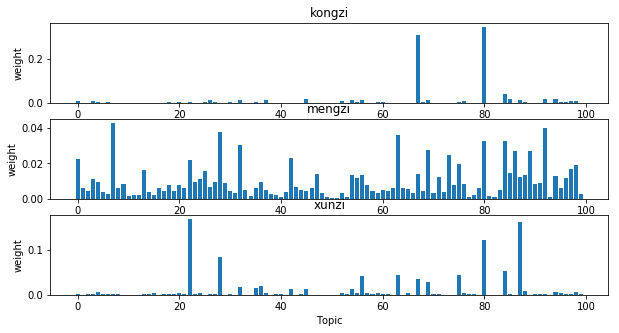

In [14]:
la=kongzi
topick=[]
topicweightk=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topick.append(a[0])
    topicweightk.append(a[1])
la=mengzi
topicm=[]
topicweightm=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicm.append(a[0])
    topicweightm.append(a[1])
la=xunzi
topicx=[]
topicweightx=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicx.append(a[0])
    topicweightx.append(a[1])

fig10 = plt.figure(figsize=(10,5))

ax10_1 = plt.subplot(3,1,1)
plt.bar(topick, topicweightk)
ax10_1.set_xlabel('Topic')
ax10_1.set_ylabel('weight')
ax10_1.set_title('kongzi')

ax10_2 = plt.subplot(3,1,2)
plt.bar(topicm, topicweightm)
ax10_2.set_xlabel('Topic')
ax10_2.set_ylabel('weight')
ax10_2.set_title('mengzi')

ax10_3 = plt.subplot(3,1,3)
plt.bar(topicx, topicweightx)
ax10_3.set_xlabel('Topic')
ax10_3.set_ylabel('weight')
ax10_3.set_title('xunzi')

plt.savefig('Figure 10')

##  Figure 11 Formal Interpretation Matrix of Intersections of Analects, Mencius and Xunzi with Topic Keywords (∩=intersection of sets)


In [16]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
# name =['ethical rulership 道德规范','benevolent rule 德政','ethics&politics 伦理&政治','kindheartedness 仁','politics&war 政治&战争','filial piety 孝']
keywords=[]

for a in kmx:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KMX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordk[i1])
for a in km:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    j = top10topics.index(a)
    Document.append('KM')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordm[i2])
for a in kx:
    
    i1 = topick.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])
for a in mx:
    
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('MX')
    TextWeight.append(str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])


data11 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"keywords":keywords}
f11 = DataFrame(data11,columns=['Document','Text Weight','Topic','Corpus Weight','keywords'])
f11

,Document,Text Weight,Topic,Corpus Weight,keywords
0,KMX,0.015280382/0.027507227/0.02745416,69,0.030357,人 可 心 臣 一 义 政 宜 内 意
1,KMX,0.34698212/0.03285796/0.121151015,80,0.025326,人 君子 行 可 道 事 能 仁 善 敬
2,KMX,0.040316146/0.03268718/0.05356242,84,0.026380,民 君 国 上 事 可 行 政 能 人
3,KM,0.017474288/0.039845124,92,0.030423,王 命 民 天 德 厥 尔 予 克 周
4,KX,0.013358133/0.042356554,56,0.014544,贤 世 士 能 人 死 身 行 义 名
5,KX,0.3097327/0.035273716,67,0.011698,孔 人 闻 可 贡 鲁 行 路 礼 君子
6,KX,0.014356197/0.16158503,87,0.011124,人 可 说 马 一 名 利 能 恶 ─
7,MX,0.03751927/0.08391283,28,0.031351,人 天 能 可 道 圣 物 事 生 心
8,MX,0.035988707/0.044609256,63,0.028121,主 国 臣 民 法 人 治 君 令 能


In [3]:
### ## calculate the distance among words in a topic


import synonyms
import numpy as np

def calculate_sy(topic1):
    count = 0
    dis_sum = 0
    topiclength = len(topic1)
    dis_matri = np.zeros((topiclength, topiclength))

    for i in range(0,topiclength):
        for j in range(0,topiclength):
            dis_matri[i,j] = synonyms.compare(topic1[i], topic1[j], seg = False)
            if i != j and  dis_matri[i,j] != 0.0:
                count += 1
                dis_sum += dis_matri[i,j]
    print(dis_matri)
    print ("距离矩阵距离总和（不含对角线）",dis_sum)
    print ("距离矩阵非0元素个数（不含对角线）",count)
    return dis_sum / count

## eg.
topic1 = ["罪","刑","法","杀","死","官","犯","盗","狱","律","徒","赦","杖","本","年"]
calculate_sy(topic1)

# 注释：缺少“年”

In [23]:
from vsm.spatial import KL_div

def similarity(c1,c2):
    A = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            A[m][n]= v.dist(v.labels[c1[m]],v.labels[c2[n]]) 
    print "while k quals",k,',','JSD goes',np.mean(A)
    return np.mean(A)

def kl_similarity(c1,c2):
    A = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            A[m][n]= v.dist(v.labels[c1[m]],v.labels[c2[n]], dist_fn=KL_div) 
    print "while k quals",k,',','first to second KLD goes',np.mean(A)
    
    B = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            B[m][n]= v.dist(v.labels[c2[n]],v.labels[c1[m]], dist_fn=KL_div) 
    print "while k quals",k,',','second to first KLD goes',np.mean(B)    
    return np.mean(A),np.mean(B)

def perplexity(theta, corpus, v):
    a = (v.phi[corpus] * theta).sum(axis=1)
    a = np.log2(a).sum()
    return a / len(corpus)

corpus = v.corpus.corpus
d_value = dict([])
for i in range(4):
    k = topic_range[i]
    v = lda_v[k]
    theta = v.aggregate_doc_topics(all_ids)
    theta = theta[np.argsort(theta['i'])]
    theta = np.array(theta['value'])
    P = perplexity(theta, corpus, v)
    d_value[str(k)] = []
    print 'kongzi mengzi JSD'
    d_value[str(k)].append(similarity(kongzi,mengzi))
    print 'kongzi xunzi JSD'
    d_value[str(k)].append(similarity(kongzi,xunzi))
    print 'xunzi mengzi JSD'
    d_value[str(k)].append(similarity(xunzi,mengzi))
    print 'kongzi mengzi KLD'
    d_value[str(k)].append(kl_similarity(kongzi,mengzi)[0])
    d_value[str(k)].append(kl_similarity(kongzi,mengzi)[1])
    print 'kongzi xunzi KLD'
    d_value[str(k)].append(kl_similarity(kongzi,xunzi)[0])
    d_value[str(k)].append(kl_similarity(kongzi,xunzi)[1])
    print 'xunzi mengzi KLD'
    d_value[str(k)].append(kl_similarity(xunzi,mengzi)[0])
    d_value[str(k)].append(kl_similarity(xunzi,mengzi)[1])
    d_value[str(k)].append(P)

topicname = []
topicname.append('kongzi mengzi JSD')
topicname.append('kongzi xunzi JSD')
topicname.append ('xunzi mengzi JSD')
topicname.append('kongzi mengzi KLD')
topicname.append('mengzi kongzi KLD')
topicname.append('kongzi xunzi KLD')
topicname.append('xunzi kongzi KLD')
topicname.append('xunzi mengzi KLD')
topicname.append('mengzi xunzi KLD')
topicname.append('perplexity')    

print d_value

from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 

#data3 = {"name":topicname,"20":d_value['20'],"40":d_value['40'],"60":d_value['60'],"80":d_value['80'],"100":d_value['100'],}
#f3 = DataFrame(data3,columns=['name','20','40','60','80','100'])
data3 = {"name":topicname,"20":d_value['20'],"40":d_value['40'],"60":d_value['60'],"80":d_value['80']}
f3 = DataFrame(data3,columns=['name','20','40','60','80'])
f3

,name,20,40,60,80
0,kongzi mengzi JSD,0.502624,0.663251,0.748051,0.756590
1,kongzi xunzi JSD,0.684372,0.772512,0.820636,0.825571
2,xunzi mengzi JSD,0.687273,0.723992,0.759266,0.821985
3,kongzi mengzi KLD,2.541777,4.566546,6.236774,6.037030
4,mengzi kongzi KLD,3.604001,5.890287,6.815234,7.167713
5,kongzi xunzi KLD,4.949025,7.318167,8.807498,9.111315
6,xunzi kongzi KLD,7.036140,7.735578,8.511626,7.811477
7,xunzi mengzi KLD,6.197308,7.796640,7.573198,8.434170
8,mengzi xunzi KLD,5.537930,6.343358,6.891223,8.798655
9,perplexity,-10.309549,-10.309539,-10.309564,-10.309610


In [24]:
### perplexity

In [32]:
from corpus import *
import numpy as np

def perplexity(theta, corpus, v):
    a = (v.phi[corpus] * theta).sum(axis=1)
    a = np.log2(a).sum()
    return a / len(corpus)

v = lda_v[80]
corpus = v.corpus.corpus

# v.aggregate_doc_topics returns an ndarray instead of just values.
theta = v.aggregate_doc_topics(all_ids)
print 'theta 1 step',theta
theta = theta[np.argsort(theta['i'])]
print 'theat2 step',theta
theta = np.array(theta['value'])
print 'theta3 step',theta

P = perplexity(theta, corpus, v)
print 'whole corpus',P


### scater

In [27]:
from corpus import *
from vsm import *

# This code calculates the probabilities for topics appearing in a document
# run this in a Jupyter Notebook
v = lda_v[100]
%pylab inline

p_tds = []
p_tds_var = []
for i in range(100):
    past_idx = 0
    p_td = v.doc_topic_matrix(all_ids)[:,i]
    p_tds.append(np.mean(p_td))
    p_tds_var.append(np.var(p_td))
    print i, np.sum(p_td), len(p_td)
print(p_tds)

Text(0,0.5,u'\\sqrt{var p(t|d)}')

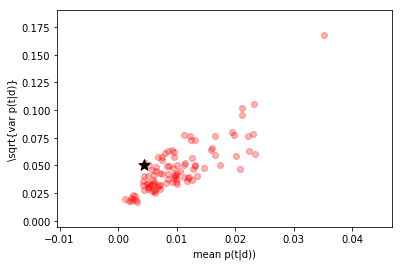

In [28]:
scatter(p_tds, np.sqrt(p_tds_var), c='r', alpha=0.3)
scatter(p_tds[9], np.sqrt(p_tds_var[9]), marker='*', s=140, c='k')

xlabel("mean p(t|d))")
ylabel(r"\sqrt{var p(t|d)}")

0

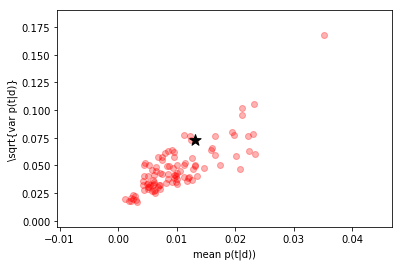

In [31]:
def draw(topic):
    scatter(p_tds, np.sqrt(p_tds_var), c='r', alpha=0.3)
    scatter(p_tds[topic], np.sqrt(p_tds_var[topic]), marker='*', s=140, c='k')
    xlabel("mean p(t|d))")
    ylabel(r"\sqrt{var p(t|d)}")
    return 0

draw(10)

### compare with Nichoals paper

In [45]:
from hanziconv import HanziConv
top29 = '天 上 下 大 道 中 人 時 後 地 長 從 成 德'
top97 = '心 見 明 合 失 平 陽 意 神 福 離 陰 各 惑'
top76 = '君 人 公 能 死 見 欲 知 先 得 父 臣 事 辭'
top21 = '民 君 行 國 治 能 得 事 政 下 食 教 官 道'
top23 = '天 道 下 物 知 德 生 能 聖 人 得 身 言 神'
top66 = '國 日 食 歸 成 樂 白 東 亡 師 走 害 望 夜'
top72 = '人 得 相 發 士 小 時 殺 用 意 石 立 莫 主'
top34 = '君 人 義 禮 能 賢 莫 天 惡 安 亂 下 善 性'
top78 = '人 知 言 名 用 治 能 欲 學 文 小 富 彼 盜'
top10 = '今 心 後 力 憂 豈 朝 死 誠 棄 觀 入 罪 古'
x = [top29,top97,top76,top21,top23,top66,top72,top34,top78,top10]
nc_top10 = []
for a in x:
    a = HanziConv.toSimplified(a)
    a = a.split(' ')
    tmp = []
    for b in a:
        try:
            
            v.dist_word_top(b.decode('utf-8'))
            tmp.append(b.decode('utf-8'))
        except:
            print b,a
        
    nc_top10.append(tmp)
    
for a in nc_top10:
    print len(a)